<a href="https://colab.research.google.com/github/sakamototaisei/python_colab/blob/main/%E5%AE%9F%E8%B7%B5%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **第1章 ウェブから注文数を分析する10本ノック**

## 1：データを読み込んでみよう

In [ ]:
import pandas as pd

customer_master = pd.read_csv('customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [ ]:
item_master = pd.read_csv('item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [ ]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


## 2：データを結合(ユニオン)してみよう

In [ ]:
transaction_2 = pd.read_csv('transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [ ]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [ ]:
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


## 3：売り上げデータ同士を結合(ジョイン)してみよう

In [ ]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on='transaction_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [ ]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


## 4：マスターデータを結合(ジョイン)してみよう

In [ ]:
join_data = pd.merge(join_data, customer_master, on='customer_id', how='left')
join_data = pd.merge(join_data, item_master, on='item_id', how='left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


## 5：必要なデータ列を作ろう

4種6個ののデータを1つに結合したが売り上げ(price)が落ちてしまっているのでquantityとitem_priceで計算する

In [ ]:
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


## 6：データ検算をしよう

In [ ]:
print(join_data['price'].sum())
print(transaction['price'].sum())

971135000
971135000


In [ ]:
join_data['price'].sum() == transaction['price'].sum()

True

## 7：各種統計料を把握しよう

In [ ]:
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [ ]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [ ]:
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


## 8：月別でデータを集計してみよう

In [ ]:
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [ ]:
join_data['payment_date'] = pd.to_datetime(join_data['payment_date'])
join_data['payment_month'] = join_data['payment_date'].dt.strftime('%Y%m')
join_data[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [ ]:
join_data.groupby('payment_month').sum()['price']

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

## 9：月別、商品別でデータを集計してみよう

In [ ]:
join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [ ]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

## 10：商品別の売り上げ推移を可視化してみよう

In [ ]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

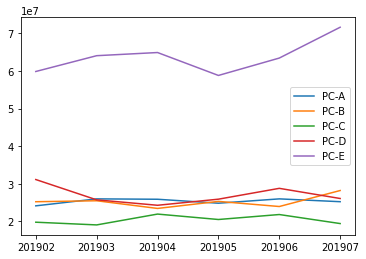

In [ ]:
plt.plot(list(graph_data.index), graph_data['PC-A'], label='PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label='PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label='PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label='PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label='PC-E')
plt.legend()

# **第2章 小売店のデータでデータ加工を行う10本ノック**

## 11：データを読み込んでみよう

In [ ]:
import pandas as pd

uriage_data = pd.read_csv('uriage.csv')
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [ ]:
kokyaku_data = pd.read_excel('kokyaku_daicho.xlsx')
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


## 12：データの揺れを見てみよう

In [ ]:
uriage_data['item_name'].head()

0      商品A
1    商 品 S
2    商 品 a
3      商品Z
4      商品a
Name: item_name, dtype: object

In [ ]:
uriage_data['item_price'].head()

0     100.0
1       NaN
2       NaN
3    2600.0
4       NaN
Name: item_price, dtype: float64

## 13：データに揺れがあるまま集計してみる

In [ ]:
uriage_data['purchase_date'] = pd.to_datetime(uriage_data['purchase_date'])
uriage_data['purchase_month'] = uriage_data['purchase_date'].dt.strftime('%Y%m')
res = uriage_data.pivot_table(index='purchase_month', columns='item_name', aggfunc='size', fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [ ]:
res = uriage_data.pivot_table(index='purchase_month', columns='item_name', values='item_price', aggfunc='sum', fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0,1400,0,0,0,0,0,0,0,0,...,1100,1200,1500,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,0,2400,0,0,...,0,0,0,0,0,1900,2000,2200,0,0
201903,0,0,500,1300,1600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,2300,0,0,0,0,0,0,0,0,1700,...,0,0,0,0,0,1900,0,0,0,0
201905,0,0,0,0,0,1900,0,0,0,0,...,0,1200,0,0,0,0,0,0,0,2500
201906,0,0,0,0,0,0,2300,0,0,0,...,0,0,0,1600,0,0,0,0,2400,0
201907,0,0,0,0,0,0,0,0,0,0,...,0,0,1500,0,1800,0,0,0,0,0


## 14：商品名の揺れを補正しよう

In [ ]:
print(len(pd.unique(uriage_data.item_name)))

99


In [ ]:
uriage_data['item_name'] = uriage_data['item_name'].str.upper()
uriage_data['item_name'] = uriage_data['item_name'].str.replace('　', '')
uriage_data['item_name'] = uriage_data['item_name'].str.replace(' ', '')
uriage_data.sort_values(by=['item_name'], ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_manth,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906,201906
1748,2019-05-19 20:22:22,商品A,100.0,松川綾女,201905,201905
223,2019-06-25 08:13:20,商品A,100.0,板橋隆,201906,201906
1742,2019-06-13 16:03:17,商品A,100.0,小平陽子,201906,201906
1738,2019-02-10 00:28:43,商品A,100.0,松田浩正,201902,201902
...,...,...,...,...,...,...
2880,2019-04-22 00:36:52,商品Y,NaN,田辺光洋,201904,201904
2881,2019-04-30 14:21:09,商品Y,NaN,高原充則,201904,201904
1525,2019-01-24 10:27:23,商品Y,2500.0,五十嵐春樹,201901,201901
1361,2019-05-28 13:45:32,商品Y,2500.0,大崎ヒカル,201905,201905


In [ ]:
print(pd.unique(uriage_data['item_name']))
print(len(pd.unique(uriage_data['item_name'])))

['商品A' '商品S' '商品Z' '商品V' '商品O' '商品U' '商品L' '商品C' '商品I' '商品R' '商品X' '商品G'
 '商品P' '商品Q' '商品Y' '商品N' '商品W' '商品E' '商品K' '商品B' '商品F' '商品D' '商品M' '商品H'
 '商品T' '商品J']
26


## 15：金額欠損値の補完を行う

In [ ]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_manth    False
purchase_month    False
dtype: bool

In [ ]:
flg_is_null = uriage_data['item_price'].isnull()
for trg in list(uriage_data.loc[flg_is_null, 'item_name'].unique()):
    price = uriage_data.loc[(flg_is_null == False) & (uriage_data['item_name'] == trg), 'item_price'].max()
    uriage_data['item_price'].loc[(flg_is_null) & (uriage_data['item_name'] == trg)] = price
uriage_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,purchase_date,item_name,item_price,customer_name,purchase_manth,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906,201906
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二,201907,201907
2,2019-05-11 19:42:07,商品A,100.0,南部慶二,201905,201905
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,201902,201902
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,201904,201904


In [ ]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price        False
customer_name     False
purchase_manth    False
purchase_month    False
dtype: bool

In [ ]:
for trg in list(uriage_data['item_name'].sort_values().unique()):
    print(trg + 'の最大額: ' + str(uriage_data.loc[uriage_data['item_name'] == trg]['item_price'].max()) + 'の最小額: ' + str(uriage_data.loc[uriage_data['item_name'] == trg]['item_price'].min(skipna=False)))

商品Aの最大額: 100.0の最小額: 100.0
商品Bの最大額: 200.0の最小額: 200.0
商品Cの最大額: 300.0の最小額: 300.0
商品Dの最大額: 400.0の最小額: 400.0
商品Eの最大額: 500.0の最小額: 500.0
商品Fの最大額: 600.0の最小額: 600.0
商品Gの最大額: 700.0の最小額: 700.0
商品Hの最大額: 800.0の最小額: 800.0
商品Iの最大額: 900.0の最小額: 900.0
商品Jの最大額: 1000.0の最小額: 1000.0
商品Kの最大額: 1100.0の最小額: 1100.0
商品Lの最大額: 1200.0の最小額: 1200.0
商品Mの最大額: 1300.0の最小額: 1300.0
商品Nの最大額: 1400.0の最小額: 1400.0
商品Oの最大額: 1500.0の最小額: 1500.0
商品Pの最大額: 1600.0の最小額: 1600.0
商品Qの最大額: 1700.0の最小額: 1700.0
商品Rの最大額: 1800.0の最小額: 1800.0
商品Sの最大額: 1900.0の最小額: 1900.0
商品Tの最大額: 2000.0の最小額: 2000.0
商品Uの最大額: 2100.0の最小額: 2100.0
商品Vの最大額: 2200.0の最小額: 2200.0
商品Wの最大額: 2300.0の最小額: 2300.0
商品Xの最大額: 2400.0の最小額: 2400.0
商品Yの最大額: 2500.0の最小額: 2500.0
商品Zの最大額: 2600.0の最小額: 2600.0


## 16：顧客名の揺れを補正しよう

In [ ]:
kokyaku_data['顧客名'].head()

0     須賀ひとみ
1    岡田　 敏也
2      芳賀 希
3     荻野  愛
4     栗田 憲一
Name: 顧客名, dtype: object

In [ ]:
uriage_data['customer_name'].head()

0    深井菜々美
1     浅田賢二
2     南部慶二
3     麻生莉緒
4     平田鉄二
Name: customer_name, dtype: object

In [ ]:
kokyaku_data['顧客名'] = kokyaku_data['顧客名'].str.replace(' ', '')
kokyaku_data['顧客名'] = kokyaku_data['顧客名'].str.replace('　', '')
kokyaku_data['顧客名'].head()

0    須賀ひとみ
1     岡田敏也
2      芳賀希
3      荻野愛
4     栗田憲一
Name: 顧客名, dtype: object

## 17：日付の揺れを補正しよう

In [ ]:
flg_is_serial = kokyaku_data['登録日'].astype('str').str.isdigit()
flg_is_serial.sum()

22

In [ ]:
fromSerial = pd.to_timedelta(kokyaku_data.loc[fgl_is_serial, '登録日'].astype('float'),  unit='D') + pd.to_datetime('1900/01/01')
fromSerial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 登録日, dtype: datetime64[ns]

In [ ]:
fromString = pd.to_datetime(kokyaku_data.loc[flg_is_serial == False, '登録日'])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 登録日, Length: 178, dtype: datetime64[ns]

In [ ]:
kokyaku_data['登録日'] = pd.concat([fromSerial, fromString])
kokyaku_data

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,2017-02-18
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018-01-07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,2017-05-19
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,2018-01-29
...,...,...,...,...,...
195,川上りえ,かわかみ りえ,G市,kawakami_rie@example.com,2017-06-20
196,小松季衣,こまつ としえ,E市,komatsu_toshie@example.com,2018-06-20
197,白鳥りえ,しらとり りえ,F市,shiratori_rie@example.com,2017-04-29
198,大西隆之介,おおにし りゅうのすけ,H市,oonishi_ryuunosuke@example.com,2019-04-19


In [ ]:
kokyaku_data['登録年月'] = kokyaku_data['登録日'].dt.strftime('%Y%m')
rslt = kokyaku_data.groupby('登録年月').count()['顧客名']
print(rslt)
print(len(kokyaku_data))

登録年月
201701    15
201702    11
201703    14
201704    15
201705    13
201706    14
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 顧客名, dtype: int64
200


In [ ]:
flg_is_serial = kokyaku_data['登録日'].astype('str').str.isdigit()
flg_is_serial.sum()

0

## 18：顧客名をキーに2つのデータを結合(ジョイン)しよう

In [ ]:
join_data = pd.merge(uriage_data, kokyaku_data, left_on='customer_name', right_on='顧客名', how='left')
join_data = join_data.drop('customer_name', axis=1)
join_data.head()

,purchase_date,item_name,item_price,purchase_manth,purchase_month,顧客名,かな,地域,メールアドレス,登録日,登録年月
0,2019-06-13 18:02:34,商品A,100.0,201906,201906,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26,201701
1,2019-07-13 13:05:29,商品S,1900.0,201907,201907,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07,201804
2,2019-05-11 19:42:07,商品A,100.0,201905,201905,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19,201806
3,2019-02-12 23:40:45,商品Z,2600.0,201902,201902,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22,201807
4,2019-04-22 03:09:35,商品A,100.0,201904,201904,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07,201706


##19：クレンジングしたデータをダンプしよう

In [ ]:
dump_data = join_data[['purchase_date', 'purchase_month', 'item_name', 'item_price', '顧客名', 'かな', '地域', 'メールアドレス', '登録日']]
dump_data

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,201906,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26
1,2019-07-13 13:05:29,201907,商品S,1900.0,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07
2,2019-05-11 19:42:07,201905,商品A,100.0,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19
3,2019-02-12 23:40:45,201902,商品Z,2600.0,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22
4,2019-04-22 03:09:35,201904,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07
...,...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:39,201902,商品Y,2500.0,福島友也,ふくしま ともや,B市,fukushima_tomoya@example.com,2017-07-01
2995,2019-06-22 04:03:43,201906,商品M,1300.0,大倉晃司,おおくら こうじ,E市,ookura_kouji@example.com,2018-03-31
2996,2019-03-29 11:14:05,201903,商品Q,1700.0,尾形小雁,おがた こがん,B市,ogata_kogan@example.com,2017-03-15
2997,2019-07-14 12:56:49,201907,商品H,800.0,芦田博之,あしだ ひろゆき,E市,ashida_hiroyuki@example.com,2018-07-15


In [ ]:
dump_data.to_csv('dump_data.csv', index=False)

## 20：データを集計してみよう

In [ ]:
import_data = pd.read_csv('dump_data.csv')
import_data.head()

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,201906,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26 00:00:00
1,2019-07-13 13:05:29,201907,商品S,1900.0,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07 00:00:00
2,2019-05-11 19:42:07,201905,商品A,100.0,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19 00:00:00
3,2019-02-12 23:40:45,201902,商品Z,2600.0,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22 00:00:00
4,2019-04-22 03:09:35,201904,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07 00:00:00


In [ ]:
byItem = import_data.pivot_table(index='purchase_month', columns='item_name', aggfunc='size', fill_value=0)
byItem

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
201902,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
201903,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
201904,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
201905,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
201906,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
201907,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [ ]:
byPrice = import_data.pivot_table(index='purchase_month', columns='item_name', values='item_price', aggfunc='sum', fill_value=0)
byPrice

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1800,2600,5700,6800,9000,9000,7700,12800,16200,17000,...,28900,37800,38000,34000,14700,48400,29900,33600,25000,0
201902,1900,2800,7800,8400,8000,8400,9800,13600,10800,14000,...,37400,39600,41800,46000,39900,48400,55200,38400,27500,2600
201903,1700,4200,6000,6800,4500,16200,9800,14400,10800,16000,...,39100,28800,38000,24000,48300,39600,36800,50400,40000,0
201904,1700,3800,7200,8000,9000,10200,9800,8800,16200,13000,...,34000,36000,30400,32000,23100,33000,32200,38400,50000,0
201905,2400,2800,4800,5600,9500,10800,16100,12000,14400,11000,...,22100,39600,34200,32000,33600,19800,48300,38400,50000,0
201906,2400,2400,3300,7600,6500,10800,10500,10400,17100,22000,...,25500,28800,39900,24000,37800,44000,39100,36000,32500,0
201907,2000,4000,5100,6800,6000,10200,13300,15200,17100,23000,...,25500,34200,43700,42000,27300,61600,36800,43200,30000,0


In [ ]:
byCostomer = import_data.pivot_table(index='purchase_month', columns='顧客名', aggfunc='size', fill_value=0)
byCostomer

顧客名,さだ千佳子,中仁晶,中田美智子,丸山光臣,久保田倫子,亀井一徳,五十嵐春樹,井上桃子,井口寛治,井川真悠子,...,香椎優一,高原充則,高梨結衣,高沢美咲,高田さんま,鳥居広司,鶴岡薫,麻生莉緒,黄川田博之,黒谷長利
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,3,1,4,2,2,0,5,3,3,1,...,0,1,1,1,5,2,0,2,2,5
201902,9,1,2,2,1,4,2,1,0,4,...,4,0,3,2,0,1,2,4,0,1
201903,1,2,1,6,1,4,3,3,2,2,...,3,1,6,2,4,2,4,2,2,1
201904,0,3,1,2,0,2,2,0,3,2,...,2,4,2,3,4,3,2,1,2,0
201905,3,2,5,2,4,1,2,1,3,3,...,1,1,1,0,2,2,3,4,4,1
201906,1,3,0,4,1,1,1,2,2,3,...,7,3,0,2,1,0,2,1,2,4
201907,3,0,3,2,5,3,5,2,5,5,...,2,4,4,2,0,2,4,3,4,1


In [ ]:
byRegion = import_data.pivot_table(index='purchase_month', columns='地域', aggfunc='size', fill_value=0)
byRegion

地域,A市,B市,C市,D市,E市,F市,G市,H市
purchase_month,,,,,,,,
201901,59,55,72,34,49,57,49,42
201902,71,46,65,48,61,52,43,63
201903,64,52,57,43,52,59,51,59
201904,64,48,54,45,48,58,40,52
201905,57,52,68,48,59,65,35,43
201906,53,47,61,30,51,51,58,58
201907,76,53,61,42,54,64,47,54


In [ ]:
away_data = pd.merge(uriage_data, kokyaku_data, left_on='customer_name', right_on='顧客名', how='right')
away_data[away_data['purchase_date'].isnull()][['顧客名', 'メールアドレス', '登録日']]

,顧客名,メールアドレス,登録日
2999,福井美希,fukui_miki1@example.com,2019-04-23


# **第3章 顧客の全体像を把握する10本ノック**

 ## 21：データを読み込んで把握しよう

In [ ]:
import pandas as pd

uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [ ]:
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [ ]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [ ]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


## 22：顧客データを整形しよう

In [ ]:
customer_join = pd.merge(customer, class_master, on='class', how='left')
customer_join = pd.merge(customer_join, campaign_master, on='campaign_id', how='left')
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [ ]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

## 23：顧客データの基礎集計をしよう

In [ ]:
customer_join.groupby('class_name').count()['customer_id']

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [ ]:
customer_join.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [ ]:
customer_join.groupby('gender').count()['customer_id']

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [ ]:
customer_join.groupby('is_deleted').count()['customer_id']

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [ ]:
customer_join['start_date'] = pd.to_datetime(customer_join['start_date'])
customer_start = customer_join.loc[customer_join['start_date'] > pd.to_datetime('20180401')]
print(len(customer_start))

1361


## 24：最新顧客データの基礎集計をしてみよう

In [ ]:
customer_join['end_date'] = pd.to_datetime(customer_join['end_date'])
customer_newer = customer_join.loc[(customer_join['end_date'] >= pd.to_datetime('20190331')) | (customer_join['end_date'].isna())]
print(len(customer_newer))
customer_newer['end_date'].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
customer_newer.groupby('class_name').count()['customer_id']

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [ ]:
customer_newer.groupby('campaign_name').count()['customer_id']

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [ ]:
customer_newer.groupby('gender').count()['customer_id']

gender
F    1400
M    1553
Name: customer_id, dtype: int64

## 25：利用履歴データを集計しよう

In [ ]:
uselog['usedate'].head()

0    2018-04-01
1    2018-04-01
2    2018-04-01
3    2018-04-01
4    2018-04-01
Name: usedate, dtype: object

In [ ]:
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['年月'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['年月', 'customer_id'], as_index=False).count()
uselog_months.rename(columns={'log_id':'count'}, inplace=True)
del uselog_months['usedate']
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [ ]:
uselog_customer = uselog_months.groupby('customer_id').agg(['mean', 'median', 'max', 'min'])['count']
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


## 26：利用履歴データから定期利用フラグを作成しよう

In [ ]:
uselog['weekday'] = uselog['usedate'].dt.weekday
uselog_weekday = uselog.groupby(['customer_id', '年月', 'weekday'], as_index=False).count()[['customer_id', '年月', 'weekday', 'log_id']]
uselog_weekday.rename(columns={'log_id':'count'}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [ ]:
uselog_weekday = uselog_weekday.groupby('customer_id', as_index=False).max()[['customer_id', 'count']]
uselog_weekday['routine_flg'] = 0
uselog_weekday['routine_flg'] = uselog_weekday['routine_flg'].where(uselog_weekday['count']<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


## 27：顧客データを利用履歴データを結合しよう

In [ ]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,routine_flg_x,calc_date,membership_period,routine_flg_y,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,2019-04-30,47,1,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,2019-04-30,47,1,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,2019-04-30,47,1,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,2019-04-30,47,1,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,1,2019-04-30,47,1,3.916667,4.0,6,1,1


In [ ]:
customer_join.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
routine_flg_x           0
calc_date               0
membership_period       0
routine_flg_y           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
dtype: int64

## 28：会員期間を計算しよう

In [ ]:
from dateutil.relativedelta import relativedelta

customer_join['calc_date'] = customer_join['end_date']
customer_join['calc_date'] = customer_join['calc_date'].fillna(pd.to_datetime('20190430'))
customer_join['membership_period'] = 0

for i in range(len(customer_join)):
    delta = relativedelta(customer_join['calc_date'].iloc[i], customer_join['start_date'].iloc[i])
    customer_join['membership_period'].iloc[i] = delta.years*12 + delta.months

customer_join.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,routine_flg_x,calc_date,membership_period,routine_flg_y,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,2019-04-30,47,1,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,2019-04-30,47,1,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,2019-04-30,47,1,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,1,2019-04-30,47,1,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,1,2019-04-30,47,1,3.916667,4.0,6,1,1


## 29：顧客行動の各種統計量を把握しよう

In [ ]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [ ]:
customer_join.groupby('routine_flg').count()['customer_id']

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

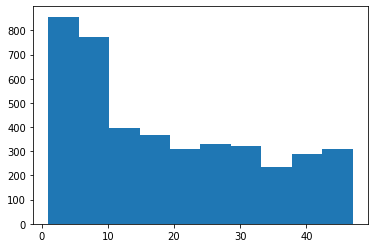

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(customer_join['membership_period'])

## 30：退会ユーザーと継続ユーザーの違いを把握しよう

In [ ]:
customer_end = customer_join.loc[customer_join['is_deleted'] == 1]
customer_end.describe()

,is_deleted,price,routine_flg_x,membership_period,routine_flg_y,mean,median,max,min,routine_flg
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,0.456296,8.026667,0.456296,3.865474,3.621852,6.461481,1.821481,0.456296
std,0.0,1949.163652,0.498271,5.033692,0.498271,1.246385,1.270847,2.584021,0.976361,0.498271
min,1.0,6000.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.0,6000.000000,0.000000,4.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000
50%,1.0,7500.000000,0.000000,7.000000,0.000000,4.000000,4.000000,7.000000,2.000000,0.000000
75%,1.0,10500.000000,1.000000,11.000000,1.000000,4.666667,4.500000,8.000000,2.000000,1.000000
max,1.0,10500.000000,1.000000,23.000000,1.000000,9.000000,9.000000,13.000000,8.000000,1.000000


In [ ]:
customer_stay = customer_join.loc[customer_join['is_deleted'] == 0]
customer_stay.describe()

,is_deleted,price,routine_flg_x,membership_period,routine_flg_y,mean,median,max,min,routine_flg
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,0.984166,23.970443,0.984166,6.030288,6.024279,8.471147,3.620690,0.984166
std,0.0,1977.189779,0.124855,13.746761,0.124855,1.553587,1.599765,1.571048,2.030488,0.124855
min,0.0,6000.000000,0.000000,1.000000,0.000000,3.166667,3.000000,5.000000,1.000000,0.000000
25%,0.0,6000.000000,1.000000,12.000000,1.000000,4.833333,5.000000,7.000000,2.000000,1.000000
50%,0.0,7500.000000,1.000000,24.000000,1.000000,5.583333,5.500000,8.000000,3.000000,1.000000
75%,0.0,10500.000000,1.000000,35.000000,1.000000,7.178030,7.000000,10.000000,5.000000,1.000000
max,0.0,10500.000000,1.000000,47.000000,1.000000,12.000000,12.000000,14.000000,12.000000,1.000000


In [ ]:
customer_join.to_csv('customer_join.csv', index=False)

# **第4章 顧客の行動を予測する10本ノック**